# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Sofia
- **Email:** Feisofiafei@gmail.com
- **ID Dicoding:** sofiafei

## Menentukan Pertanyaan Bisnis

- Apakah kecepatan waktu delivery mempengaruhi review customer?
- Berapa persentase keberhasilan delivery kepada customer?

## Import Semua Packages/Library yang Digunakan

Menginstall semua package yang diperlukan dengan syntax pip install dan membaca (-r) file requirements.txt

In [2]:
pip install -r requirements.txt

Mengimport library yang diperlukan

In [3]:
import zipfile
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

#### Download Dataset

Pertama-tama didownload terlebih dahulu Ecommerce Public dataset pada gdrive dengan menggunakan gdown

In [4]:
!gdown 1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK

Downloading...
From (original): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK
From (redirected): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK&confirm=t&uuid=1001a12f-3926-47ce-b29e-c2673f643093
To: c:\Users\sofia\proyek_analisis_data\submission\E-commerce-public-dataset.zip

  0%|          | 0.00/44.9M [00:00<?, ?B/s]
  1%|          | 524k/44.9M [00:00<01:14, 596kB/s]
  2%|▏         | 1.05M/44.9M [00:01<01:08, 638kB/s]
  4%|▎         | 1.57M/44.9M [00:02<01:11, 608kB/s]
  5%|▍         | 2.10M/44.9M [00:03<01:09, 614kB/s]
  6%|▌         | 2.62M/44.9M [00:04<01:10, 602kB/s]
  7%|▋         | 3.15M/44.9M [00:05<01:09, 599kB/s]
  8%|▊         | 3.67M/44.9M [00:06<01:07, 611kB/s]
  9%|▉         | 4.19M/44.9M [00:06<01:07, 603kB/s]
 11%|█         | 4.72M/44.9M [00:07<01:05, 609kB/s]
 12%|█▏        | 5.24M/44.9M [00:08<01:07, 589kB/s]
 13%|█▎        | 5.77M/44.9M [00:09<01:05, 599kB/s]
 14%|█▍        | 6.29M/44.9M [00:10<01:03, 605kB/s]
 15%|█▌        | 6

Dilakukan extracting data pada E-commerce-public-dataset.zip yang dimasukkan kedalam folder data

In [5]:
with zipfile.ZipFile("E-commerce-public-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("data")

#### Load Table

Melakukan load pada setiap tabel dengan menggunakan data dari file csv dan menampilkan 5 data teratas menggunakan .head()

In [6]:
customers_df = pd.read_csv("data\E-Commerce Public Dataset\customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
geolocation_df = pd.read_csv("data\E-Commerce Public Dataset\geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [108]:
orders_df = pd.read_csv("data\E-Commerce Public Dataset\orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
order_items_df = pd.read_csv("data\E-Commerce Public Dataset\order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
order_payments_df = pd.read_csv("data\E-Commerce Public Dataset\order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
order_reviews_df = pd.read_csv("data\E-Commerce Public Dataset\order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [12]:
products_df = pd.read_csv("data\E-Commerce Public Dataset\products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
product_translation_df = pd.read_csv("data\E-Commerce Public Dataset\product_category_name_translation.csv")
product_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [14]:
sellers_df = pd.read_csv("data\E-Commerce Public Dataset\sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

Membuat function untuk melakukan filtering pada data nama kota (city) yang invalid berdasarkan pola dengan menggunakan regular expression

In [15]:
def city_filter(data, col):
    pattern = re.compile("[^a-z\sA-Z0-9-\'+]")
    filter_df = data[data[col].str.contains(pattern)]
    return filter_df

#### Menilai Customers_df

In [16]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Dari informasi tersebut, tidak terlihat ada missing value, serta tipe data sesuai

In [17]:
print("Jumlah duplikasi: ",customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Dari informasi tersebut, terlihat tidak ada duplikasi data

In [18]:
customers_df['customer_city'].value_counts()

customer_city
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: count, Length: 4119, dtype: int64

In [19]:
city_filter(customers_df, 'customer_city')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


Dari informasi tersebut, tidak ada invalid data pada kolom customer_city sehingga data sesuai

#### Menilai geolocation_df

In [20]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Dari informasi tersebut, tidak terlihat ada missing value, serta tipe data sesuai

In [21]:
print("Jumlah duplikasi: ",geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


Dari informasi tersebut, terdapat 261831 duplikasi data yang perlu dilakukan cleaning

In [22]:
geolocation_df['geolocation_city'].value_counts()

geolocation_city
sao paulo               135800
rio de janeiro           62151
belo horizonte           27805
são paulo                24918
curitiba                 16593
                         ...  
jacuípe                      1
mar vermelho                 1
quebrangulo                  1
poço das trincheiras         1
poxim                        1
Name: count, Length: 8011, dtype: int64

dari informasi tersebut, terdapat perbedaan penulisan kota pada data geolocation_city, seperti sao paulo dan são paulo yang dianggap berbeda. Untuk itu perlu dilakukan pengubahan special character (ã) dengan character standar.

In [23]:
city_filter(geolocation_df, 'geolocation_city')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
5,1012,-23.547762,-46.635361,são paulo,SP
14,1037,-23.545187,-46.637855,são paulo,SP
17,1024,-23.541390,-46.629899,são paulo,SP
21,1020,-23.552235,-46.628441,são paulo,SP
22,1011,-23.546690,-46.635447,são paulo,SP
...,...,...,...,...,...
1000094,99940,-28.060955,-51.858637,ibiaçá,RS
1000096,99900,-27.884844,-52.230025,getúlio vargas,RS
1000098,99900,-27.900022,-52.237668,getúlio vargas,RS
1000143,99930,-27.913659,-52.248615,estação,RS


Dari informasi city_filter tersebut, masih terdapat beberapa invalid geolocation_city name yang perlu dilakukan cleaning

In [24]:
geolocation_df[geolocation_df['geolocation_zip_code_prefix']==45936].head(15)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
694783,45936,-12.883913,-38.478122,itabatan,BA
694790,45936,-17.999945,-39.868270,itabata,BA
694792,45936,-12.903227,-38.308831,itabata,BA
694832,45936,-12.921871,-38.491053,itabatan,BA
694905,45936,-18.000329,-39.867793,itabata,BA
694910,45936,-12.807618,-38.395391,itabata,BA
694939,45936,-18.010597,-39.864476,itabata,BA
694996,45936,-18.006772,-39.863218,itabata,BA
695000,45936,-14.670199,-40.489571,itabata,BA
695014,45936,-12.921859,-38.441688,itabata,BA


Dari informasi pengecekan geolocation_zip_code_prefix terdapat variasi penamaan geolocation_city yang berbeda-beda, seperti itabatan, itabata, itabatan (mucuri)

#### Menilai orders_df

In [109]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Dari informasi tersebut terdapat missing value, dan tipe data yang salah. order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date seharusnya bertipe data datetime.

In [110]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Dari informasi tersebut, terdapat 160 missing value pada order_approved_at, 1783 missing value pada order_delivered_carrier_date, dan 2965 missing value pada order_delivered_customer_date

In [111]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Dari informasi tersebut, terlihat tidak ada duplikasi data

#### Menilai order_items_df

In [28]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Dari informasi tersebut tidak terdapat missing value, namun tipe data shipping_limit_date seharusnya bertipe datetime

In [29]:
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Dari informasi tersebut, tidak terdapat duplikasi data

#### Menilai order_payments_df

In [30]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Dari informasi tersebut, tidak ada missing values dan tipe data sudah benar

In [31]:
print("Jumlah duplikasi: ",order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Dari informasi tersebut, tidak ada duplikasi data

#### Menilai order_reviews_df

In [32]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Dari informasi tersebut, terdapat missing values pada review_comment_title dan review_comment_message, dan tipe data review_creation_date dan review_answer_timestamp seharusnya bertipe data datetime

In [33]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Dari informasi tersebut, terdapat 87656 missing value pada review_comment_title, dan 58247 missing value pada review_comment_message

In [34]:
print("Jumlah duplikasi: ",order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Dari informasi tersebut, tidak terdapat duplikasi data. Dan didapatkan rata-rata rating berkisar di 4

#### Menilai products_df

In [35]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Dari informasi tersebut terdapat missing values, namun tipe data sudah benar

In [36]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Dari informasi tersebut, terdapat 610 missing values masing-masing pada product_category_name, product_name_lenght_ dan product_photos_qty. Terdapat 2 missing values masing-masing pada product_weight_g, product_length_cm, product_height_cm, product_width_cm.

In [37]:
print("Jumlah duplikasi: ",products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Dari informasi tersebut, tidak terdapat duplikasi data

#### Menilai product_translation_df

In [38]:
product_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Dari informasi tersebut, tidak terdapat missing value dan tipe data sudah benar

In [39]:
print("Jumlah duplikasi: ",product_translation_df.duplicated().sum())
product_translation_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Dari informasi tersebut, tidak terdapat duplikasi data dan product_category masing-masing unik sebanyak 71 kategori

In [40]:
product_translation_df['product_category_name'].value_counts()

product_category_name
beleza_saude                        1
alimentos                           1
fashion_esporte                     1
fashion_underwear_e_moda_praia      1
construcao_ferramentas_seguranca    1
                                   ..
malas_acessorios                    1
cool_stuff                          1
fashion_calcados                    1
audio                               1
seguros_e_servicos                  1
Name: count, Length: 71, dtype: int64

#### Menilai sellers_df

In [41]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


dari informasi tersebut, tidak terdapat missing value dan tipe data sudah benar

In [42]:
print("Jumlah duplikasi: ",sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


dari informasi tersebut tidak terdapat duplikasi data

In [43]:
city_filter(sellers_df, 'seller_city')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
237,c3aad7dc65449ae90a5e9c3c6c1e78e0,15350,auriflama/sp,SP
246,71593c7413973a1e160057b80d4958f6,3407,sao paulo / sao paulo,SP
360,a3fa18b3f688ec0fca3eb8bfcbd2d5b3,4557,são paulo,SP
476,26b482dccfa29bd2e40703ba45523702,13450,santa barbara d´oeste,SP
551,723a46b89fd5c3ed78ccdf039e33ac63,93310,"novo hamburgo, rio grande do sul, brasil",RS
622,7994b065a7ffb14e71c6312cf87b9de2,29142,cariacica / es,ES
869,cbf09e831b0c11f6f23ffb51004db972,9726,sbc/sp,SP
874,4aba391bc3b88717ce08eb11e44937b2,45816,arraial d'ajuda (porto seguro),BA
945,f52c2422904463fdd7741f99045fecb6,9230,santo andre/sao paulo,SP
1004,1cbd32d00d01bb8087a5eb088612fd9c,3363,sp / sp,SP


Dari informasi city_filter tersebut, masih terdapat beberapa invalid seller_city name yang perlu dilakukan cleaning

### Cleaning Data

#### Membersihkan data customers_df

data pada customers_df sudah bersih sehingga tidak perlu dilakukan proses cleaning

#### Membersihkan data geolocation_df

Menghilangkan duplikasi pada data

In [44]:
geolocation_df.drop_duplicates(inplace=True)

In [45]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


Membuat function replace_char untuk mengubah special character menjadi standar character untuk geolocation_city

In [46]:
def replace_char(city_name):
    city_name = re.sub(r'[ãââàáä]', 'a', city_name)
    city_name = re.sub(r'[íîì]', 'i', city_name)
    city_name = re.sub(r'[úûùü]', 'u', city_name)
    city_name = re.sub(r'[éêèë]', 'e', city_name)
    city_name = re.sub(r'[óõôòö]', 'o', city_name)
    city_name = re.sub(r'[ç]', 'c', city_name)
    return city_name

Diterapkan ke kolom geolocation_city dengan menggunakan function replace_char

In [47]:
geolocation_df['geolocation_city'] =geolocation_df['geolocation_city'].apply(replace_char)

In [48]:
geolocation_df['geolocation_city'].value_counts()

geolocation_city
sao paulo                  99645
rio de janeiro             35177
belo horizonte             19474
curitiba                   11263
brasilia                    8791
                           ...  
cachoeira de santa cruz        1
quixaba                        1
curumim                        1
xangrila                       1
bento fernandes                1
Name: count, Length: 5969, dtype: int64

Memperbaiki invalid name pada geolocation_city yang mengandung variasi data untuk geolocation_zip_code_prefix yang sama. Maka geolocation_city akan direplace dengan nilai mode yang sesuai dengan geolocation_zip_code_prefix menggunakan for loop

In [49]:
for i in geolocation_df['geolocation_zip_code_prefix'].unique():
    mode_city = geolocation_df[geolocation_df['geolocation_zip_code_prefix'] == i]['geolocation_city'].mode().values[0]
    geolocation_df.loc[geolocation_df['geolocation_zip_code_prefix'] == i, 'geolocation_city'] = mode_city

Mengubah kolom geolocation_city kedalam bentuk title case

In [50]:
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].str.title()

Melakukan pengecekan terhadap invalid city name

In [51]:
city_filter(geolocation_df, 'geolocation_city')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


#### Membersihkan data orders_df

Memperbaiki tipe data menjadi datetime

In [112]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S')
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')

In [113]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Melihat missing value pada kolom order_approved_at

In [115]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


Karena banyak informasi penting yang akan hilang jika dilakukan drop kolom, maka dilakukan imputation dimana dianggap order_approve_at diisi dengan order_purchase_timestamp, dan order_delivered_customer_date diisi dengan order_estimated_delivery_date

In [121]:
orders_df['order_approved_at'] =orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'])

In [122]:
orders_df['order_delivered_customer_date'].fillna(orders_df['order_estimated_delivery_date'],inplace = True)

C:\Users\sofia\AppData\Local\Temp\ipykernel_11804\965559998.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_delivered_customer_date'].fillna(orders_df['order_estimated_delivery_date'],inplace = True)


In [123]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1783
order_delivered_customer_date       0
order_estimated_delivery_date       0
dtype: int64

In [127]:
orders_df.drop(labels = 'order_delivered_carrier_date',axis = 1, inplace = True)

In [131]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [132]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_customer_date  99441 non-null  datetime64[ns]
 6   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.3+ MB


karena kolom order_delivered_carrier_date tidak digunakan untuk menjawab pertanyaan saya. Maka saya melakukan drop row untuk menghilangkan missing value

#### Membersihkan data order_items_df

Memperbaiki tipe data menjadi datetime

In [57]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'], format='%Y-%m-%d %H:%M:%S')

In [58]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Membersihkan data order_payments_df

data pada order_payments_df sudah bersih sehingga tidak perlu dilakukan proses cleaning

#### Membersihkan data order_reviews.df

mengubah tipa data yang salah menjadi datetime

In [59]:
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'], format='%Y-%m-%d %H:%M:%S')
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'], format='%Y-%m-%d %H:%M:%S')

In [60]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


melakukan pengecekan missing value pada data di kolom review_comment_title

In [61]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [62]:
order_reviews_df.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

melakukan pengecekan missing value pada data di kolom review_comment_message

In [63]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42


melakukan imputation untuk menghilangkan missing value dengan mengganti missing value menjadi 'no comment'

In [64]:
order_reviews_df.review_comment_message.value_counts()

review_comment_message
Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                            

In [65]:
order_reviews_df.fillna(value="no comment", inplace=True)

#### Membersihkan data products_df

In [66]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


Melakukan drop untuk menghilangkan missing value

In [67]:
products_df.dropna(axis=0, inplace=True)

In [68]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


#### Membersihkan data product_translation_df

data pada product_translation_df sudah bersih sehingga tidak perlu dilakukan proses cleaning

#### Membersihkan data sellers_df

Menghilangkan invalid seller_city name dengan menstandarisasikan berdasarkan zip code dari data geolocation yang sudah bersih. Untuk itu dilakukan merge seller_df dengan kolom geolocation_zip_code_prefix dan geolocation_city pada geolocation_df

In [69]:
sellers_df = sellers_df.merge(geolocation_df[['geolocation_zip_code_prefix', 'geolocation_city']].drop_duplicates(), 
                              left_on='seller_zip_code_prefix', 
                              right_on='geolocation_zip_code_prefix', 
                              how='left')

# Mengisi missing values pada geolocation_city dengan seller_city
sellers_df['geolocation_city'].fillna(sellers_df['seller_city'].str.title(), inplace=True)

C:\Users\sofia\AppData\Local\Temp\ipykernel_11804\3287736549.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sellers_df['geolocation_city'].fillna(sellers_df['seller_city'].str.title(), inplace=True)


Mengupdate seller_city dengan geolocation_city

In [70]:
sellers_df['seller_city'] = sellers_df['geolocation_city']

Menghapus kolom geolocation_zip_code_prefix dan geolocation_city setelah data selesai dibersihkan

In [71]:
sellers_df.drop(columns=['geolocation_zip_code_prefix', 'geolocation_city'], inplace=True)
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP


Mengecek apakah masih ada seller_city yang invalid menggunakan function city_filter

In [72]:
city_filter(sellers_df, 'seller_city')

,seller_id,seller_zip_code_prefix,seller_city,seller_state


In [73]:
sellers_df['seller_city'].value_counts()

seller_city
Sao Paulo           696
Curitiba            127
Rio De Janeiro       96
Belo Horizonte       70
Ribeirao Preto       55
                   ... 
Taruma                1
Domingos Martins      1
Messias Targino       1
Ipe                   1
Leme                  1
Name: count, Length: 555, dtype: int64

## Exploratory Data Analysis (EDA)

### Explore Data customers_df

In [74]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Didapatkan informasi jumlah pelanggan sebanyak 99441 orang dengan customer terbanyak berada di sao paulo city yaitu sebanyak 15540 customer.

In [75]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

maka didapatkan customer berpusat pada kota sao paulo yaitu sekitar 15.540, dimana perbedaanya bahkan dua kali lebih banyak dibandingkan dengan kota kedua terbanyak yaitu rio de jenairo yang sebanyak 6.882 customer

In [76]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Berdasarkan informasi tersebut, customer paling banyak berada di state SP yaitu sebanyak 41.746 customer, sedangkan paling sedikit yaitu pada state RR dengan 46 customer.

### Explore Data orders_df

dihitung delivery time dengan selisih dari order_delivered_customer_date dan order_purchase_timestamp. Kemudian hasil perhitungan tersebut diubah kedalam bentuk per hari dengan menghitung total detik dengan apply method total_seconds dan dibagi dengan 86.400 detik yang sama dengan 1 hari. Hasil tersebut disimpan kedalam kolom baru pada dataframe orders_df.

In [133]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

Menampilkan orders_df dengan kolom baru yaitu delivery_time

In [134]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,3.0


In [135]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99441,99441,99441,99441.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:07:21.164720896,2018-01-13 06:50:40.982220800,2018-01-24 03:08:37.730111232,12.878953
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-09-30 00:00:00,2016-09-30 00:00:00,1.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 21:55:13,2017-09-22 21:28:06,2017-10-03 00:00:00,7.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:54:30,2018-02-01 19:34:49,2018-02-15 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-15 17:51:03,2018-05-25 00:00:00,16.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-11-12 00:00:00,2018-11-12 00:00:00,210.000000


Berdasarkan informasi tersebut, dapat diketahui bahwa rata-rata waktu pengiriman sebesar 12.5 hari dengan nilai maksimum sebesar 210 hari dan nilai minimum sebesar 1 hari. 

### Explore Data orders_df dan customers_df

In [136]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
13270,21bc5deff554165a2c5c8c7ff3b99b0a,c2060e627ab1ca27114c573b07449269,75690,caldas novas,GO,Active
16531,68eee47eba208eb966151f2af399b896,d6252b83365994340e1f8836d62eca87,73015,brasilia,DF,Active
98587,5bb27fe3fc3b5fa97f2ae7d2ba599a53,099903381d6bf9f942002117d3d48710,4310,sao paulo,SP,Active
20339,beb0b22200844ff94eb65a9438f1a32e,e6d48052b4b13c4ea8b0b4ce98e49b70,23587,rio de janeiro,RJ,Active
18252,1f33d0198032f3cb27bfe03e09064bdf,8a08977c898feecd2e101c2a27890ae9,27933,macae,RJ,Active


Menambahkan kolom status customer apakah active melakukan order atau tidak

In [137]:
customers_df.groupby(by="status").customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

Terlihat semuanya active dan pernah melakukan order

Melakukan merge dataframe orders_df dan customers_df untuk memperoleh lebih banyak informasi

In [138]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


Menampilkan jumlah order berdasarkan kota

In [139]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


terlihat sao paulo adalah kota dengan orderan terbanyak

Menampilkan jumlah order berdasarkan state

In [140]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: order_id, dtype: int64

Terlihat state SP yang memiliki orderan terbanyak 

Menampilkan jumlah order berdasarkan status orderan

In [141]:
orders_customers_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

Telihat bahwa 96.478 orderan berhasil di delivery kepada customer, 1107 sedang dalam proses shipment, dan lainnya

### Explore data orders_df dan order_reviews_df

In [142]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99441,99441,99441,99441.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:07:21.164720896,2018-01-13 06:50:40.982220800,2018-01-24 03:08:37.730111232,12.878953
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-09-30 00:00:00,2016-09-30 00:00:00,1.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 21:55:13,2017-09-22 21:28:06,2017-10-03 00:00:00,7.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:54:30,2018-02-01 19:34:49,2018-02-15 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-15 17:51:03,2018-05-25 00:00:00,16.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-11-12 00:00:00,2018-11-12 00:00:00,210.000000


In [145]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,no comment,no comment,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


Dapat dilihat dari kedua informasi diatas bahwa delivery_time dari orderan berkisar dari 1 hingga 210 hari dengan rata-rata 13 hari. Sedangkan review dari customer terkait service ini berkisar antara 1 sampai 5 rating dengan rata-rata 4. Hal ini menunjukkan bahwa kepuasan customer cukup tinggi. 

In [147]:
delivery_review_df = pd.merge(
    left=orders_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
delivery_review_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,8.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,no comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,14.0,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,9.0,e73b67b67587f7644d5bd1a52deb1b01,5.0,no comment,no comment,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,13.0,359d03e676b3c069f62cadba8dd3f6e8,5.0,no comment,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,3.0,e50934924e227544ba8246aeb3770dd4,5.0,no comment,no comment,2018-02-17,2018-02-18 13:02:51


In [148]:
delivery_review_df.groupby("delivery_time").agg({
    'review_score': 'mean',
    'order_id': 'count'
})

,review_score,order_id
delivery_time,,
1.0,4.508403,477
2.0,4.496418,2944
3.0,4.414634,3456
4.0,4.448276,4515
5.0,4.386398,5286
...,...,...
194.0,4.000000,1
195.0,2.500000,2
196.0,1.000000,1


In [149]:
delivery_review_df.groupby("review_score").agg({
    'delivery_time': 'mean',
    'order_id': 'count'
})

,delivery_time,order_id
review_score,,
1.0,21.887518,11424
2.0,17.110124,3151
3.0,14.461426,8179
4.0,12.379741,19142
5.0,10.713264,57328


dapat dilihat bahwa delivery_time berpengaruh pada tingginya review_score pengguna. Semakin cepat atau kecil delivery_time, semakin tinggi review_score yang diberikan

### Explore Data all_df

In [201]:
# menentukan kolom yang akan dimerge agar tidak duplikat kolom hasil merge orders_df
orders_customers_cols = ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date']
delivery_review_cols = ['order_id', 'delivery_time', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']

# merge kedua dataframe 
all_df = pd.merge(
    left=orders_customers_df[orders_customers_cols],
    right=delivery_review_df[delivery_review_cols],
    how="left",
    on="order_id"
)
all_df.head()

# Convert DataFrame to CSV
all_df.to_csv('merged_data.csv', index=False)

In [165]:
status_review_df = all_df.groupby("review_score").agg({
    'order_status': lambda x: x.value_counts().to_dict(),
    'order_id': 'count'
}).reset_index()

status_review_df.rename(columns={'order_status': 'order_status_counts'}, inplace=True)

pd.set_option('display.colheader_justify', 'left') 
pd.set_option('display.max_colwidth', None)
print(status_review_df)

pd.reset_option('display.colheader_justify')
pd.reset_option('display.max_colwidth')

   review_score  \
0  1.0            
1  2.0            
2  3.0            
3  4.0            
4  5.0            

  order_status_counts                                                                                                                         \
0  {'delivered': 9406, 'shipped': 644, 'unavailable': 463, 'canceled': 422, 'processing': 256, 'invoiced': 230, 'created': 2, 'approved': 1}   
1                                    {'delivered': 2941, 'shipped': 79, 'canceled': 44, 'unavailable': 43, 'invoiced': 26, 'processing': 18}   
2                                    {'delivered': 7961, 'shipped': 110, 'canceled': 48, 'unavailable': 35, 'invoiced': 16, 'processing': 9}   
3                     {'delivered': 18987, 'shipped': 87, 'canceled': 26, 'unavailable': 20, 'invoiced': 15, 'processing': 6, 'approved': 1}   
4                     {'delivered': 57066, 'shipped': 123, 'canceled': 69, 'unavailable': 36, 'invoiced': 26, 'processing': 7, 'created': 1}   

   order_id  
0  114

Dapat dilihat dari informasi tersebut bahwa status order tidak memiliki pengaruh yang signifikan terhadap review_score. Namun jika diperhatikan pada review_score yang tinggi tingkat status deliverednya lebih besar dibanding review_score lainnya. Sedangkan pada review_score yang rendah, tingkat unavailable, canceled, processing, serta invoicednya lebih tinggi dibanding review_score lainnya. Sehingga dapat juga bahwa customer yang memberikan review_score rendah dapat dikarenakan gagalnya sampai ke proses delivered.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah kecepatan waktu delivery mempengaruhi review customer?

Berdasarkan delivery_time dan review_score

In [178]:
all_df.groupby("review_score").agg({
    'delivery_time': 'mean',
    'order_id': 'count'
})

,delivery_time,order_id
review_score,,
1.0,21.887518,11424
2.0,17.110124,3151
3.0,14.461426,8179
4.0,12.379741,19142
5.0,10.713264,57328


Pertama-tama dibuat terlebih dahulu heatmap antara delivery_time dan review_score untuk melihat korelasi antara keduanya

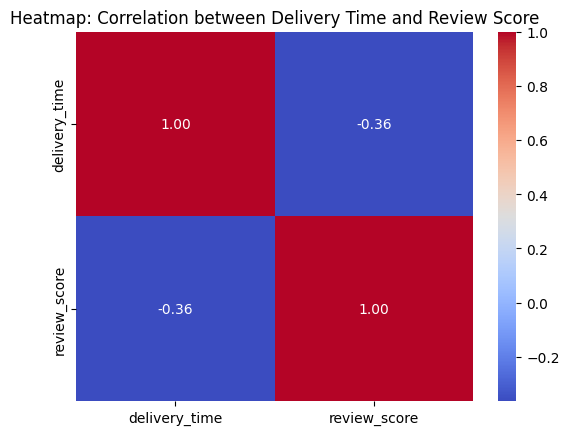

In [176]:
correlation_matrix = all_df[['delivery_time', 'review_score']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap: Correlation between Delivery Time and Review Score')
plt.show()

Dapat dilihat bahwa korelasi antara delivery time dan review score adalah -0.36. Ini menunjukkan korelasi negatif antara kedua variabel. Hal ini menunjukkan bahwa ketika salah satu variabel naik, maka yang lainnya akan turun secara linear. Sehingga benar bahwa semakin lama delivery_timenya, semakin kecil review_score yang diberikan. Semakin cepat delivery_timenya, maka semakin tinggi pula review_score yang diberikan

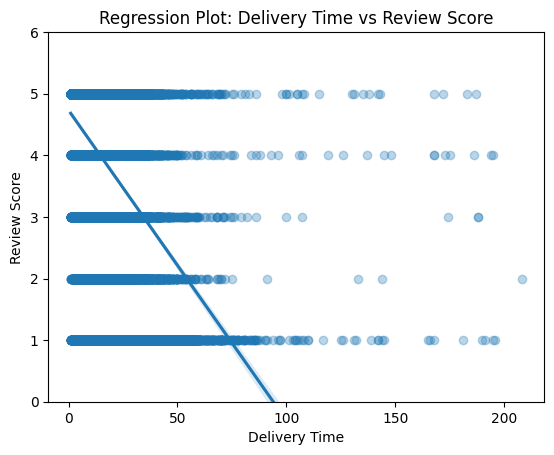

In [177]:
sns.regplot(x='delivery_time', y='review_score', data=all_df, scatter_kws={'alpha':0.3})
plt.xlabel('Delivery Time')
plt.ylabel('Review Score')
plt.title('Regression Plot: Delivery Time vs Review Score')
plt.ylim(0,6)
plt.show()

Dari regression plot tersebut, dapat dilihat pola antara delivery_time dan review_score. Garis regression tersebut menunjukkan bahwa review_score yang tinggi memiliki delivery_time yang lebih kecil, sedangkan review_score yang rendah memiliki delivery time yang lebih besar

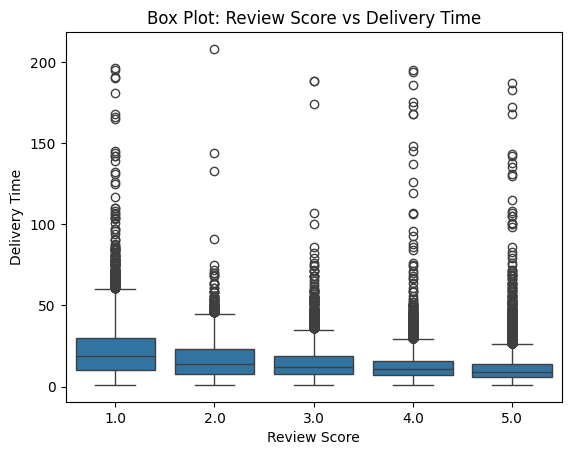

In [167]:
sns.boxplot(x='review_score', y='delivery_time', data=delivery_review_df)
plt.xlabel('Review Score')
plt.ylabel('Delivery Time')
plt.title('Box Plot: Review Score vs Delivery Time')
plt.show()

Dari boxplot tersebut dapat dilihat distribusi delivery_time pada setiap review_score. Pada review_score = 5, distribusi delivery_time memiliki range yang kecil dan median yang rendah. Hal tersebut menunjukkan bahwa delivery time dengan review score 5 cenderung memiliki waktu pengiriman yang lebih konsisten dan singkat. Jika dibandingkan dengan review_score rendah seperti 1, distribusi delivery time lebih bervariasi dengan range yang lebih besar, serta nilai mediannya juga lebih tinggi. Hal ini menunjukkan bahwa customer yang memberi review score rendah mungkin mengalami delivery time yang lebih lama

### Pertanyaan 2: Berapa persentase keberhasilan delivery kepada customer?

Berdasarkan status_order

In [179]:
all_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

Pertama-tama dilihat terlebih dahulu tren delivery yang berhasil sampai ke customer yang di resample per harinya

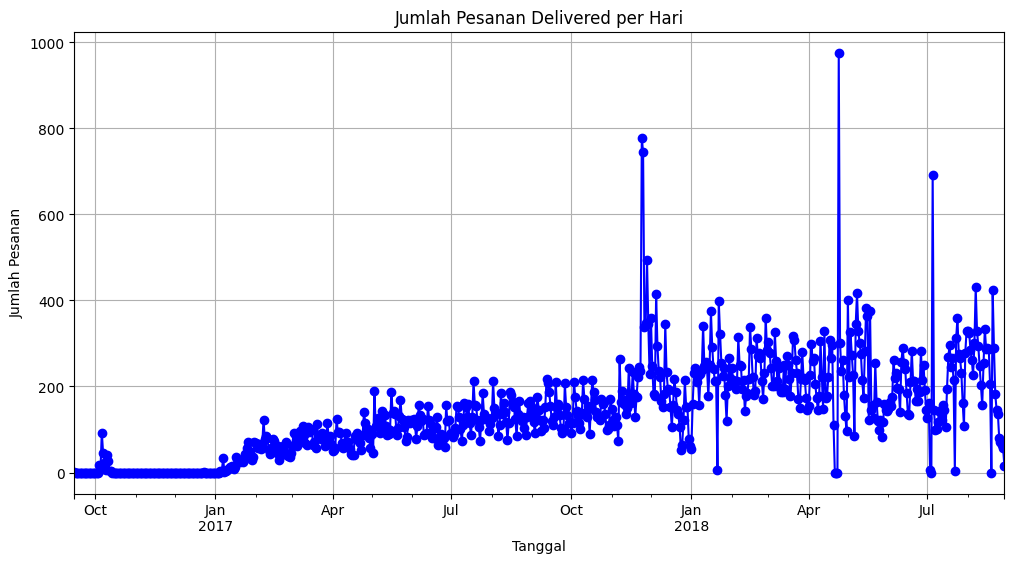

In [185]:
all_df['order_approved_at'] = pd.to_datetime(all_df['order_approved_at'])

daily_delivered_orders = all_df[all_df['order_status'] == 'delivered'].resample('D', on='order_approved_at').size()

plt.figure(figsize=(12, 6))
daily_delivered_orders.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Jumlah Pesanan Delivered per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pesanan')
plt.grid(True)
plt.show()

Dari line chart tersebut, dapat dilihat terdapat penambahan order seiring bertambahnya waktu. Terdapat juga kenaikan drastismendekati akhir tahun sebelum bulan Januari, bulan pertengahan april, serta bulan Juli. Puncak orderan yang berhasil sampai ke customer berada pada pertengahan April, dimana hampir mencapai 1000 order.

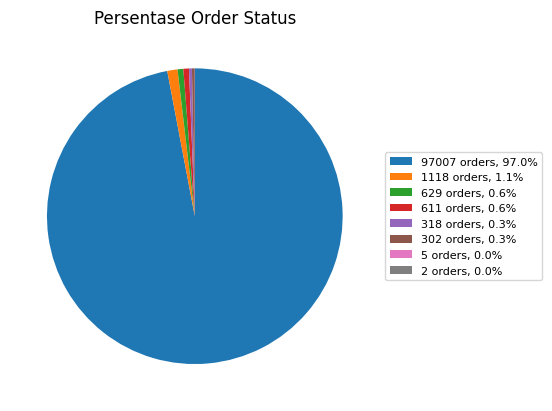

In [200]:
import matplotlib.pyplot as plt

status_counts = all_df['order_status'].value_counts()

plt.pie(status_counts, labels=None, startangle=90, counterclock=False)

# Tetap sisakan bagian legenda
legend_labels = [f"{count} orders, {percentage:.1f}%" 
                 for count, percentage in zip(status_counts, status_counts / status_counts.sum() * 100)]
plt.legend(legend_labels, bbox_to_anchor=(1, 0.5), loc="center left", fontsize=8)

plt.title('Persentase Order Status')
plt.show()


Dari pie chart tersebut, didapatkan persentase keberhasilan delivery kepada customer mencapai 97%. Hal ini tentunya sangat bagus karena menandakan efisiensi dan keberhasilan proses pengiriman produk yang baik.

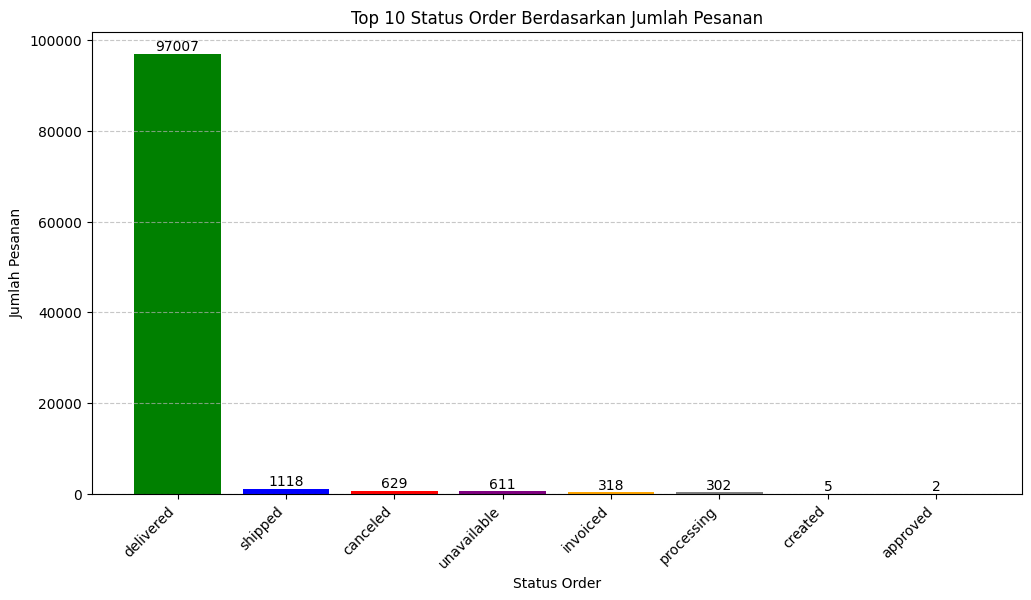

In [189]:
status_counts = all_df['order_status'].value_counts().head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(status_counts.index, status_counts.values, color=['green', 'blue', 'red', 'purple', 'orange', 'gray', 'brown', 'pink'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Status Order')
plt.ylabel('Jumlah Pesanan')
plt.title('Top 10 Status Order Berdasarkan Jumlah Pesanan')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Dengan menggunakan bar chart, dapat ditampilkan informasi jumlah pesanan untuk setiap statusn order. Dapat dilihat status delivered memiliki jumlah pesanan tertinggi, diikuti dengan shipped dan canceled. Informasi ini dapat membantu pemahaman tentang kinerja operasional dan tingkat keberhasilan pengiriman pesanan di perusahaan. Tingkat persentase delivered yang tinggi juga dapat mencerimkan kepuasan pelanggan karena pesanan tiba dengan baik.

## Conclusion

- Apakah kecepatan waktu delivery mempengaruhi review customer?
    Berdasarkan boxplot pada visualisasi ketiga, terdapat pengaruh dari delivery time terhadap review customer. Dimana semakin kecil dan cepat range dari delivery time, semakin puas customer sehingga review scorenya tinggi. Sedangkan semakin besar dan lama delivery time, semakin kecewa customer sehingga review scorenya relatif rendah. Hal ini juga diperkuat dengan melihat tren pada regression plot dimana regression linenya bergradien negatif, sehingga dapat disimpulkan delivery time dan review score bertolak belakang. Namun, jika dilihat pada heatmap, nilai yang ditampilkan sebesar -0.31. Hal ini menunjukkan bahwa pengaruh delivery time terhadap review score kurang kuat sehingga tidak secara signifikan mempengaruhi. Maka dapat disimpulkan bahwa kecepatan delivery time memang mempengaruhi review score dari customer, namun perlu diperhatikan juga terdapat beberapa faktor lainnya yang mempengaruhi review score tersebut
- Berapa persentase keberhasilan delivery kepada customer?
    Berdasarkan pie chart pada visualisasi kedua, persentase keberhasilan delivery orderan kepada customer sebesar 97%. Sementara sisanya adalah pesanan yang dibatalkan, sedang diproses, tidak tersedia, dan lainnya. Maka dengan tingkat keberhasilan pengiriman yang tinggi, dapat disimpulkan bahwa sistem delivery pada e-commerce ini berfungsi dengan baik, dan mayoritas customer menerima orderan mereka dengan sukses.